# Communication Systems 3 (ENG3014)
### Prof. D. C. Hutchings, James Watt School of Engineering, University of Glasgow
## Fourier Series Examples from Lectures and Tutorials

In [1]:
from __future__ import division
from sympy import fourier_series, Heaviside, sign, integrate, sin, cos
from sympy import pi, exp, Mod, I, Abs
from sympy import symbols, Function, simplify
from sympy.plotting import plot
from sympy import init_printing
init_printing(use_latex='mathjax')

t = symbols('t', real=True)
n = symbols('n', integer=True)
f,g = symbols('f,g', cls=Function, real=True)

### lecture 02 example 1
Find the trigonometric Fourier Series for
$$ f(t)=| \sin t | $$

  4⋅cos(2⋅t)   4⋅cos(4⋅t)   4⋅cos(6⋅t)   2
- ────────── - ────────── - ────────── + ─
     3⋅π          15⋅π         35⋅π      π

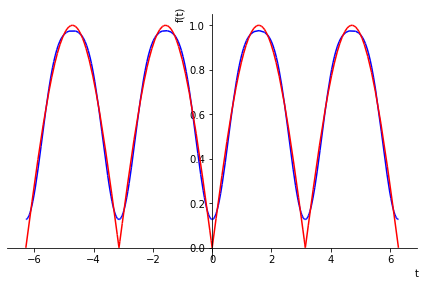

In [2]:
def f(t):
    return Abs(sin(t))
series0 = fourier_series(f(t),(t,0,pi))
display(series0.truncate(4))
#print("calculate c_n fourier coefficient manually")
#s1=integrate(exp(I*(1-2*n)*t),t)
#s2=integrate(exp(-I*(1+2*n)*t),t)
#cn=simplify(((s1-s2)/(2*I*pi)).subs(t,pi)-((s1-s2)/(2*I*pi)).subs(t,0))
graph = plot(series0.truncate(), f(t), (t,-2*pi,2*pi),show=False)
#graph = plot(cn.replace(n,0)+cn.replace(n,1)*2*cos(2*t)+cn.replace(n,2)*2*cos(4*t), (t,-2*pi,2*pi))
graph[0].line_color='b'
graph[1].line_color='r'
graph.show()

### lecture 02 example 2
Find the complex exponential Fourier Series for
$$ f(t)= \left\{ \begin{array}{rr} -1 & -\pi < t < 0\\ 1 & 0< t <\pi \end{array} \right. $$

4⋅sin(t)   4⋅sin(3⋅t)   4⋅sin(5⋅t)
──────── + ────────── + ──────────
   π          3⋅π          5⋅π    

      ⎛ ⅈ⋅t    -ⅈ⋅t⎞       ⎛ 3⋅ⅈ⋅t    -3⋅ⅈ⋅t⎞       ⎛ 5⋅ⅈ⋅t    -5⋅ⅈ⋅t⎞
  2⋅ⅈ⋅⎝ℯ    - ℯ    ⎠   2⋅ⅈ⋅⎝ℯ      - ℯ      ⎠   2⋅ⅈ⋅⎝ℯ      - ℯ      ⎠
- ────────────────── - ────────────────────── - ──────────────────────
          π                     3⋅π                      5⋅π          

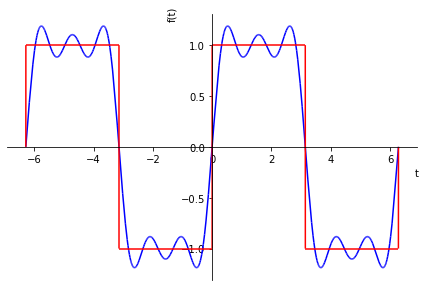

In [3]:
series1 = fourier_series(sign(t),(t,-pi,pi))
display(series1.truncate())
display(series1.truncate().rewrite(exp))
graph = plot(series1.truncate(), sign(Mod(t+pi,2*pi)-pi), (t,-2*pi,2*pi),show=False)
graph[0].line_color='b'
graph[1].line_color='r'
graph.show()

### lecture 03 example 1
Find the complex exponential Fourier Series for $\int f(t) \, \mathrm{d}t$ using $f(t)$ from the previous example

    ⎛ ⅈ⋅t    -ⅈ⋅t⎞     ⎛ 3⋅ⅈ⋅t    -3⋅ⅈ⋅t⎞     ⎛ 5⋅ⅈ⋅t    -5⋅ⅈ⋅t⎞
    ⎜ℯ      ℯ    ⎟     ⎜ℯ        ℯ      ⎟     ⎜ℯ        ℯ      ⎟
  4⋅⎜──── + ─────⎟   4⋅⎜────── + ───────⎟   4⋅⎜────── + ───────⎟
    ⎝ 2       2  ⎠     ⎝  2         2   ⎠     ⎝  2         2   ⎠
- ──────────────── - ──────────────────── - ────────────────────
         π                   9⋅π                    25⋅π        

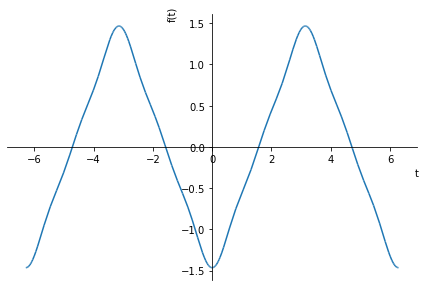

In [4]:
series2 = integrate(series1.truncate(),t)
display(series2.rewrite(exp))
graph = plot(series2, (t,-2*pi,2*pi))

### lecture 03 example 2
Manipulate the rectangular wave Fourier Series to obtain the output from a low-pass $R C$ filter

4⋅(0.8⋅sin(t) - 0.4⋅cos(t))   4⋅(0.307692307692308⋅sin(3⋅t) - 0.46153846153846
─────────────────────────── + ────────────────────────────────────────────────
             π                                            3⋅π                 

2⋅cos(3⋅t))   4⋅(0.137931034482759⋅sin(5⋅t) - 0.344827586206897⋅cos(5⋅t))   4⋅
─────────── + ─────────────────────────────────────────────────────────── + ──
                                          5⋅π                                 

(0.0754716981132075⋅sin(7⋅t) - 0.264150943396226⋅cos(7⋅t))   4⋅(0.047058823529
────────────────────────────────────────────────────────── + ─────────────────
                          7⋅π                                                 

4118⋅sin(9⋅t) - 0.211764705882353⋅cos(9⋅t))
───────────────────────────────────────────
           9⋅π                             

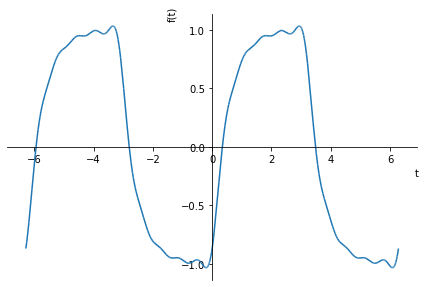

In [5]:
def g(t):
    return series1.truncate(5).subs(sin(t),(sin(t)-1*cos(t)/2)/(1+(1/2)**2))\
    .subs(sin(3*t),(sin(3*t)-3*cos(3*t)/2)/(1+(3/2)**2))\
    .subs(sin(5*t),(sin(5*t)-5*cos(5*t)/2)/(1+(5/2)**2))\
    .subs(sin(7*t),(sin(7*t)-7*cos(7*t)/2)/(1+(7/2)**2))\
    .subs(sin(9*t),(sin(9*t)-9*cos(9*t)/2)/(1+(9/2)**2))
display(g(t))
graph = plot(g(t), (t,-2*pi,2*pi)) 

### lecture 03 example 3
Here we are going to explore the Complex Exponential Fourier Series for a rectangular wave as we change the duty cycle from $\frac{1}{2}$ to $\frac{1}{4}$ and $\frac{1}{8}$.
$$ f(t) = \left\{ \begin{array}{rr} 0 & -\frac{a}{2} < t < -\frac{1}{2}\\ 1 & -\frac{1}{2} < t <\frac{1}{2}\\ 0 & \frac{1}{2} < t < \frac{a}{2} \end{array} \right. $$

    ⎛ ⅈ⋅π⋅t    -ⅈ⋅π⋅t⎞                     ⎛ 3⋅ⅈ⋅π⋅t    -3⋅ⅈ⋅π⋅t⎞       ⎛ 5⋅ⅈ⋅
    ⎜ℯ        ℯ      ⎟                     ⎜ℯ          ℯ        ⎟       ⎜ℯ    
2.0⋅⎜────── + ───────⎟   0.666666666666667⋅⎜──────── + ─────────⎟   0.4⋅⎜─────
    ⎝  2         2   ⎠                     ⎝   2           2    ⎠       ⎝   2 
────────────────────── - ──────────────────────────────────────── + ──────────
          π                                 π                                 

π⋅t    -5⋅ⅈ⋅π⋅t⎞                     ⎛ 7⋅ⅈ⋅π⋅t    -7⋅ⅈ⋅π⋅t⎞                   
      ℯ        ⎟                     ⎜ℯ          ℯ        ⎟                   
─── + ─────────⎟   0.285714285714286⋅⎜──────── + ─────────⎟   0.22222222222222
          2    ⎠                     ⎝   2           2    ⎠                   
──────────────── - ──────────────────────────────────────── + ────────────────
  π                                   π                                       

  ⎛ 9⋅ⅈ⋅π⋅t    -9⋅ⅈ⋅π⋅t⎞                     ⎛ 11⋅

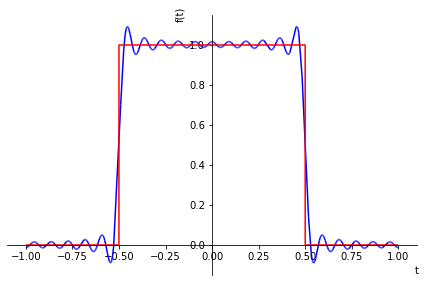

       ⎛ ⅈ⋅π⋅t    -ⅈ⋅π⋅t ⎞                                                 ⎛ 3
       ⎜ ─────    ───────⎟                                                 ⎜ ─
       ⎜   2         2   ⎟       ⎛ ⅈ⋅π⋅t    -ⅈ⋅π⋅t⎞                        ⎜  
       ⎜ℯ        ℯ       ⎟       ⎜ℯ        ℯ      ⎟                        ⎜ℯ 
1.0⋅√2⋅⎜────── + ────────⎟   1.0⋅⎜────── + ───────⎟   0.333333333333333⋅√2⋅⎜──
       ⎝  2         2    ⎠       ⎝  2         2   ⎠                        ⎝  
────────────────────────── + ────────────────────── + ────────────────────────
            π                          π                                   π  

⋅ⅈ⋅π⋅t    -3⋅ⅈ⋅π⋅t ⎞          ⎛ 5⋅ⅈ⋅π⋅t    -5⋅ⅈ⋅π⋅t ⎞                         
──────    ─────────⎟          ⎜ ───────    ─────────⎟                         
  2           2    ⎟          ⎜    2           2    ⎟                     ⎛ 3⋅
         ℯ         ⎟          ⎜ℯ          ℯ         ⎟                     ⎜ℯ  
────── + ──────────⎟   0.2⋅√2⋅⎜──────── + ─────────

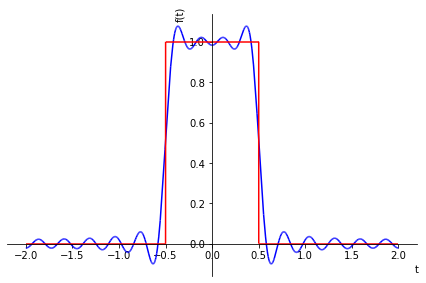

                 ⎛ ⅈ⋅π⋅t    -ⅈ⋅π⋅t ⎞          ⎛ ⅈ⋅π⋅t    -ⅈ⋅π⋅t ⎞             
                 ⎜ ─────    ───────⎟          ⎜ ─────    ───────⎟             
        ________ ⎜   4         4   ⎟          ⎜   2         2   ⎟             
       ╱ 1   √2  ⎜ℯ        ℯ       ⎟          ⎜ℯ        ℯ       ⎟             
2.0⋅  ╱  ─ - ── ⋅⎜────── + ────────⎟   0.5⋅√2⋅⎜────── + ────────⎟   0.66666666
    ╲╱   2   4   ⎝  2         2    ⎠          ⎝  2         2    ⎠             
──────────────────────────────────── + ────────────────────────── + ──────────
                 π                                 π                          

                     ⎛ 3⋅ⅈ⋅π⋅t    -3⋅ⅈ⋅π⋅t ⎞                                  
                     ⎜ ───────    ─────────⎟                                  
            ________ ⎜    4           4    ⎟       ⎛ ⅈ⋅π⋅t    -ⅈ⋅π⋅t⎞         
           ╱ √2   1  ⎜ℯ          ℯ         ⎟       ⎜ℯ        ℯ      ⎟         
6666667⋅  ╱  ── + ─ ⋅⎜──────── + ──────────⎟   0.5⋅

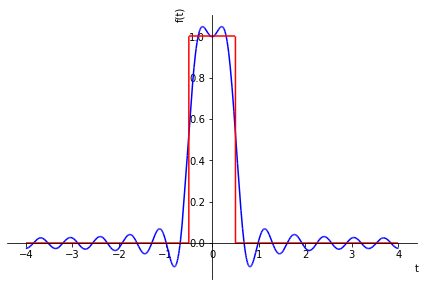

In [6]:
for a in [2,4,8]:
    def g(t):
        return Heaviside(t+1/2)-Heaviside(t-1/2)
    series3 = fourier_series(g(t),(t,-a/2,a/2))
    display(series3.truncate(12).rewrite(exp))
    graph = plot(series3.truncate(12), g(t), (t,-a/2,a/2),show=False)
    graph[0].line_color='b'
    graph[1].line_color='r'
    graph.show()

### Tutorial 1, Q5
Find the trigonometric Fourier Series for
$$ f(t)=| \cos t | $$

4⋅cos(2⋅t)   4⋅cos(4⋅t)   4⋅cos(6⋅t)   2
────────── - ────────── + ────────── + ─
   3⋅π          15⋅π         35⋅π      π

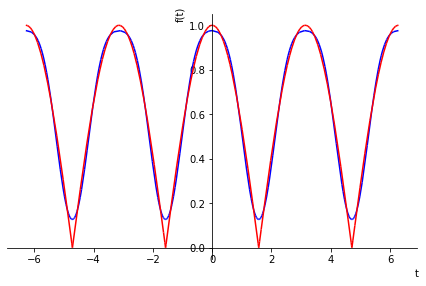

In [7]:
def f(t):
    return Abs(cos(t))
series6 = fourier_series(f(t),(t,0,pi))
display(series6.truncate(4))
#print("calculate c_n fourier coefficient manually")
#cn=simplify(((s1+s2)/(2*pi)).subs(t,pi/2)-((s1+s2)/(2*pi)).subs(t,-pi/2))
graph = plot(series6.truncate(), f(t), (t,-2*pi,2*pi),show=False)
graph[0].line_color='b'
graph[1].line_color='r'
graph.show()
#graph = plot(cn.replace(n,0)+cn.replace(n,1)*2*cos(2*t)+cn.replace(n,2)*2*cos(4*t), (t,-2*pi,2*pi))

### Tutorial 1, Q6
Find the complex exponential Fourier Series for the sawtooth waveform
$$ f(t)= \begin{array}{rr} t & -\pi < t < \pi \end{array} $$

                       ⎛ 2⋅ⅈ⋅t    -2⋅ⅈ⋅t⎞     ⎛ 3⋅ⅈ⋅t    -3⋅ⅈ⋅t⎞
    ⎛ ⅈ⋅t    -ⅈ⋅t⎞   ⅈ⋅⎝ℯ      - ℯ      ⎠   ⅈ⋅⎝ℯ      - ℯ      ⎠
- ⅈ⋅⎝ℯ    - ℯ    ⎠ + ──────────────────── - ────────────────────
                              2                      3          

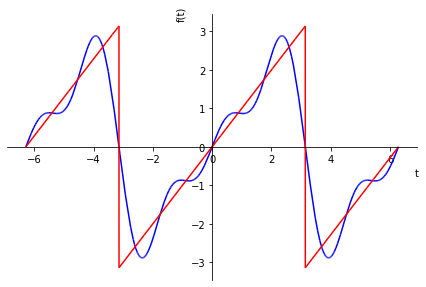

In [8]:
def f(t):
    return t
series4 = fourier_series(f(t),(t,-pi,pi))
display(series4.truncate().rewrite(exp))
graph = plot(series4.truncate(), f(Mod(t+pi,2*pi)-pi), (t,-2*pi,2*pi),show=False)
graph[0].line_color='b'
graph[1].line_color='r'
graph.show()

### Tutorial 1, Q7
Find the complex exponential Fourier Series for
$$ f(t)= \left\{ \begin{array}{rr} -1 & -\pi < t < -\frac{\pi}{2}\\ 0 & -\frac{\pi}{2} < t < \frac{\pi}{2}\\ 1 & -\frac{\pi}{2} < t <\pi \end{array} \right. $$

2⋅sin(t)   2⋅sin(2⋅t)   2⋅sin(3⋅t)   2⋅sin(5⋅t)   2⋅sin(6⋅t)   2⋅sin(7⋅t)
──────── - ────────── + ────────── + ────────── - ────────── + ──────────
   π           π           3⋅π          5⋅π          3⋅π          7⋅π    

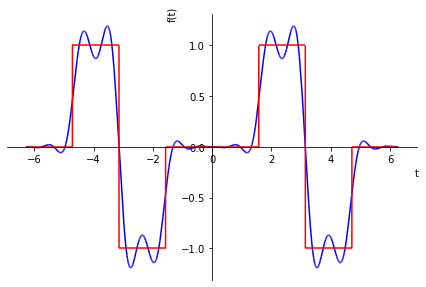

In [9]:
def f(t):
    return Heaviside(t-pi/2)-Heaviside(-t-pi/2)
series5 = fourier_series(f(t),(t,-pi,pi))
display(series5.truncate(6))
#print(series5.truncate(6).rewrite(exp))
graph = plot(series5.truncate(6), f(Mod(t+pi,2*pi)-pi), (t,-2*pi,2*pi),show=False)
graph[0].line_color='b'
graph[1].line_color='r'
graph.show()